In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df= pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [19]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking,Price_in_lakhs,Price_lakhs
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,47.667292,47.667292
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,18.704396,18.704396
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,17.500000,17.500000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,34.300000,34.300000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,43.400000,43.400000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,57.400000,57.400000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,133.000000,133.000000


In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Text(0, 0.5, 'Frequency')

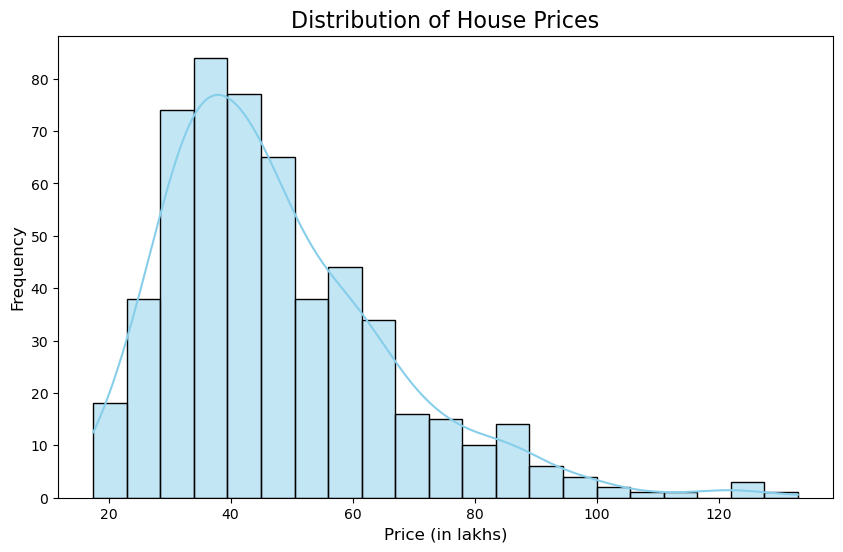

In [18]:
df['Price_lakhs'] = df['price']/100000
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_lakhs'], kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price (in lakhs)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

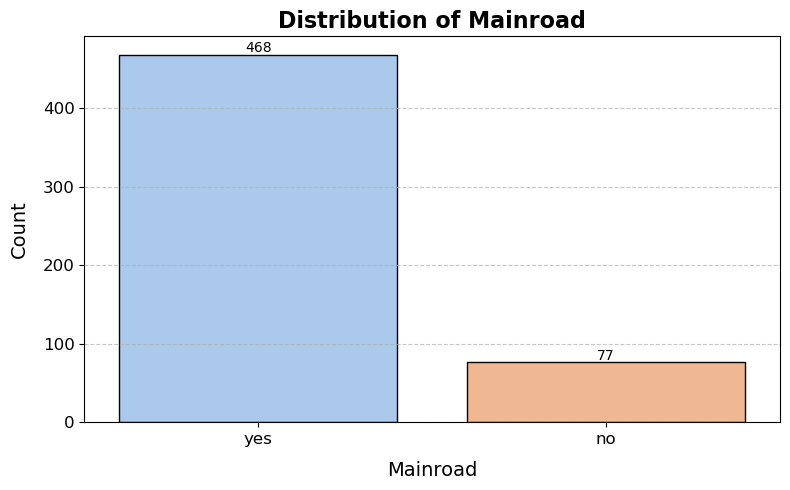

In [20]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['mainroad'], hue=df['mainroad'], palette='pastel', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Mainroad", fontsize=16, fontweight='bold')
plt.xlabel("Mainroad", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


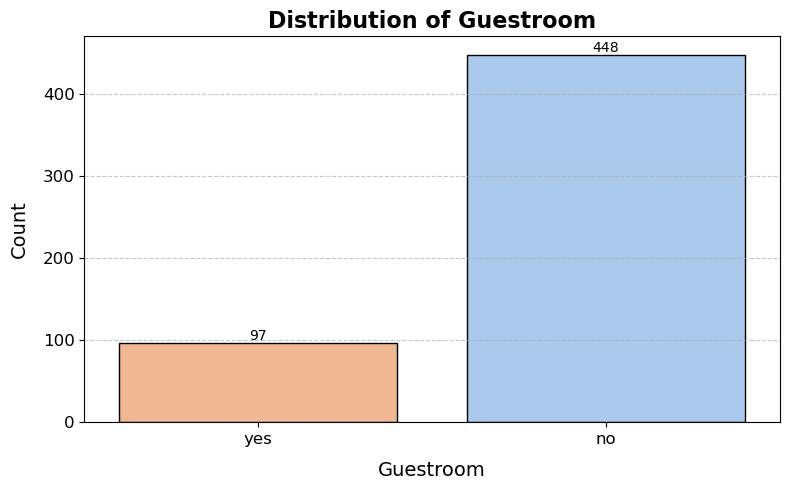

In [21]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['guestroom'], hue=df['guestroom'], palette='pastel', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Guestroom", fontsize=16, fontweight='bold')
plt.xlabel("Guestroom", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


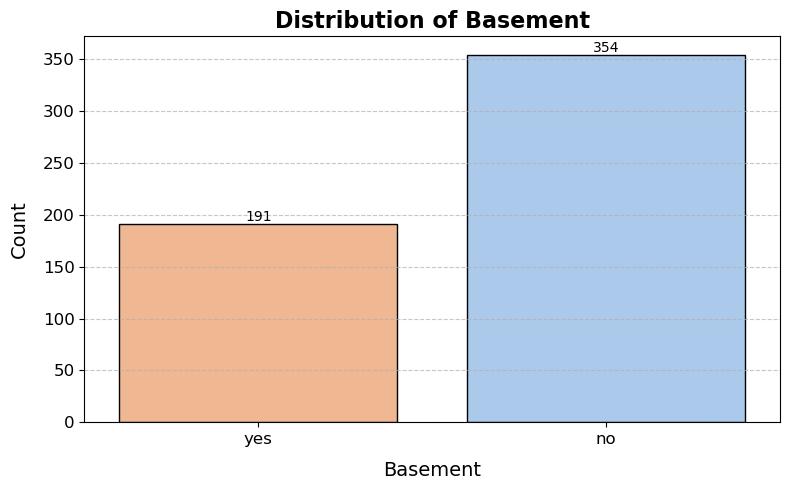

In [22]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['basement'], hue=df['basement'], palette='pastel', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Basement", fontsize=16, fontweight='bold')
plt.xlabel("Basement", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

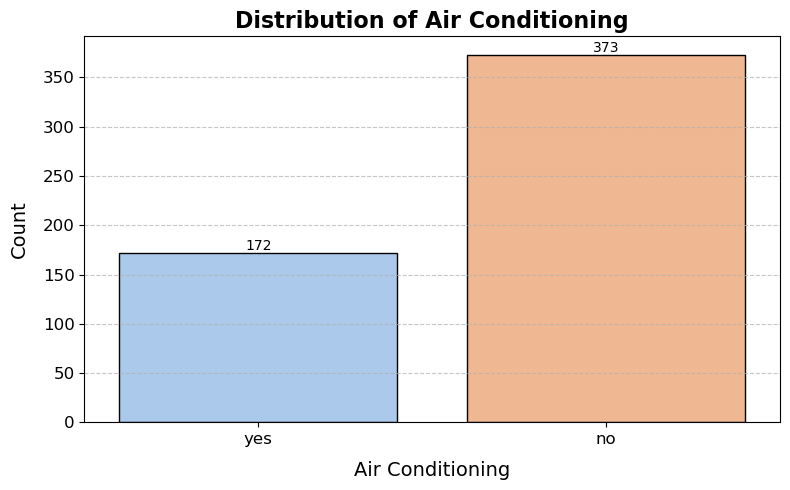

In [23]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['airconditioning'], hue=df['airconditioning'], palette='pastel', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Air Conditioning", fontsize=16, fontweight='bold')
plt.xlabel("Air Conditioning", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()



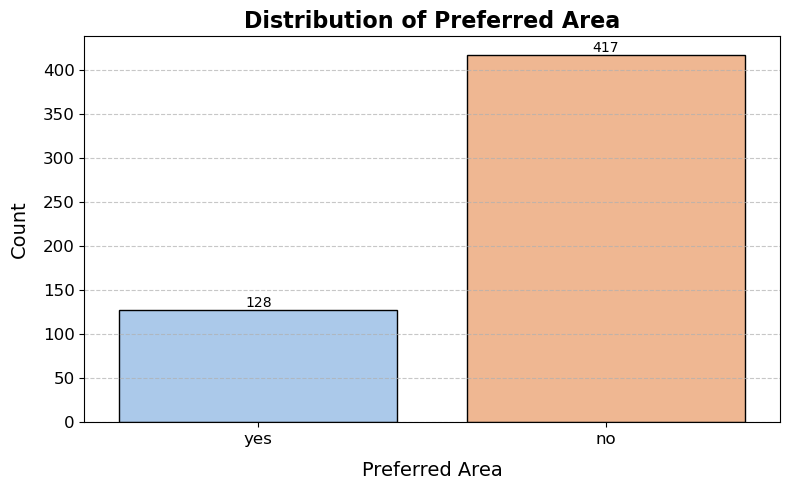

In [24]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['prefarea'], hue=df['prefarea'], palette='pastel', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Preferred Area", fontsize=16, fontweight='bold')
plt.xlabel("Preferred Area", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

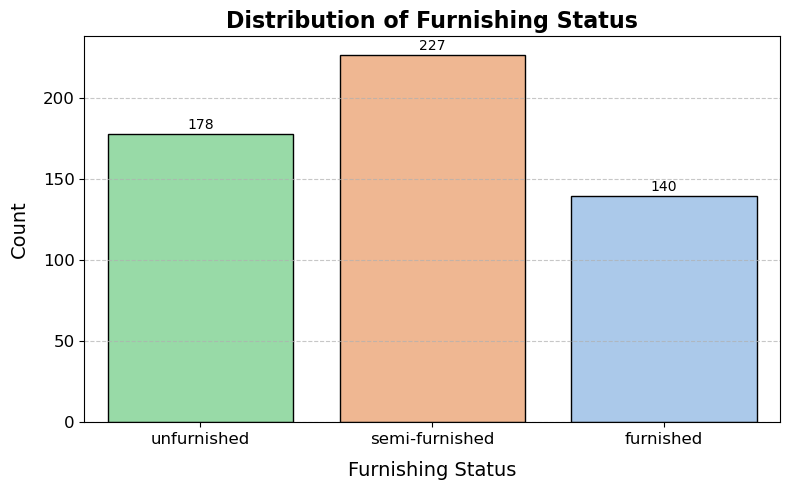

In [25]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['furnishingstatus'], hue=df['furnishingstatus'], palette='pastel', dodge=False, edgecolor='black', order=['unfurnished', 'semi-furnished', 'furnished'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Furnishing Status", fontsize=16, fontweight='bold')
plt.xlabel("Furnishing Status", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


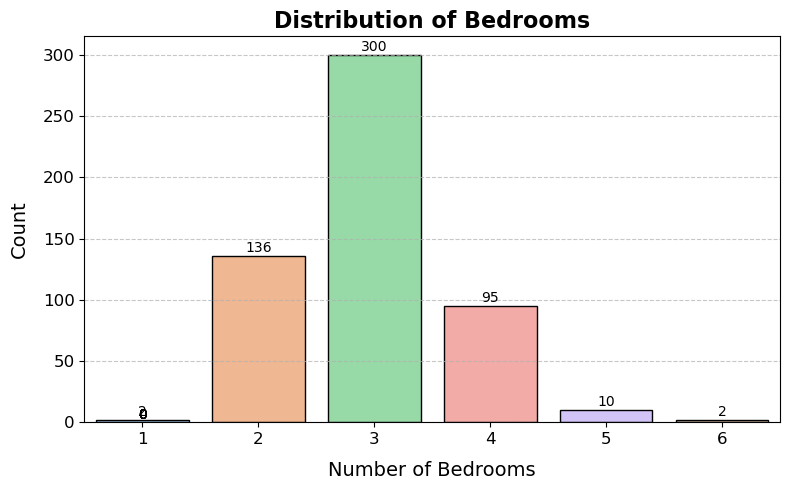

In [26]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['bedrooms'], hue=df['bedrooms'], palette='pastel', dodge=False, edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Bedrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

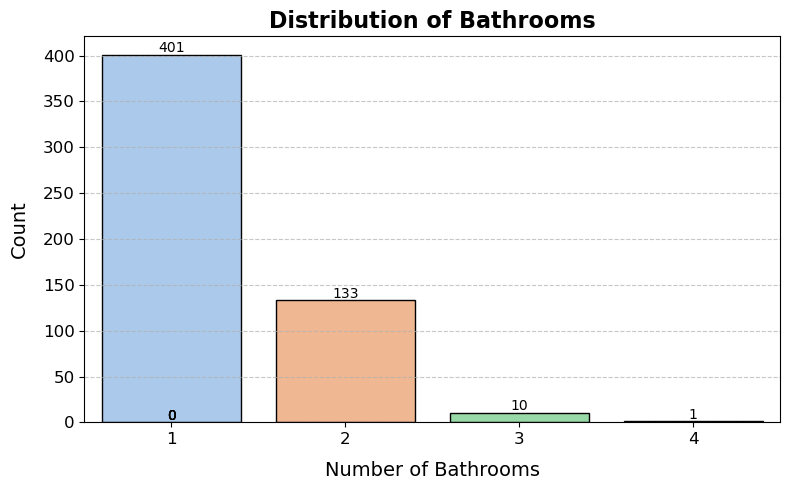

In [27]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['bathrooms'], hue=df['bathrooms'], palette='pastel', dodge=False, edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Bathrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bathrooms", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


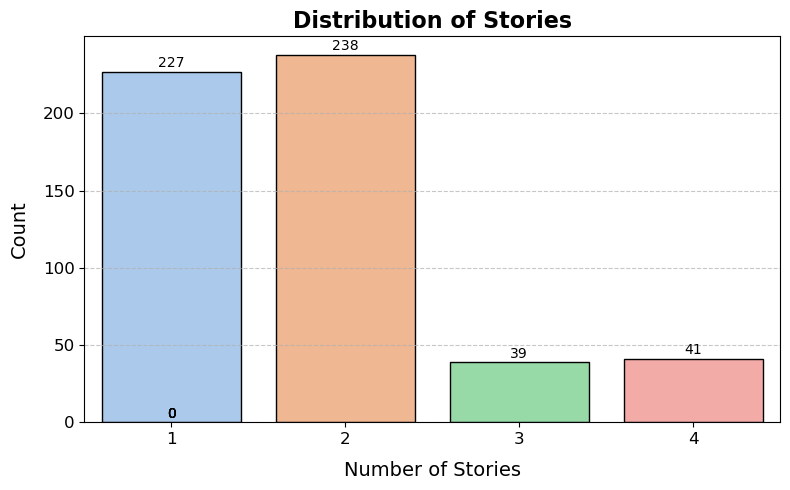

In [28]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['stories'], hue=df['stories'], palette='pastel', dodge=False, edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Stories", fontsize=16, fontweight='bold')
plt.xlabel("Number of Stories", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

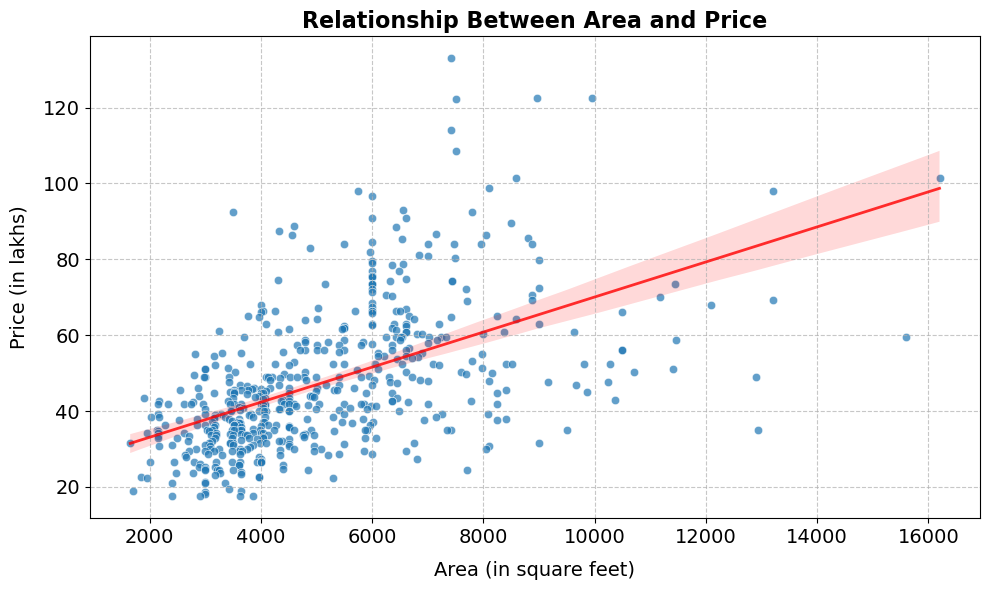

In [33]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['area'], y=df['Price_lakhs'], alpha=0.7, edgecolor='w')

sns.regplot(x=df['area'], y=df['Price_lakhs'], scatter=False, color='red', line_kws={'linewidth': 2, 'alpha': 0.8})

plt.title("Relationship Between Area and Price", fontsize=16, fontweight='bold')
plt.xlabel("Area (in square feet)", fontsize=14, labelpad=10)
plt.ylabel("Price (in lakhs)", fontsize=14, labelpad=10)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

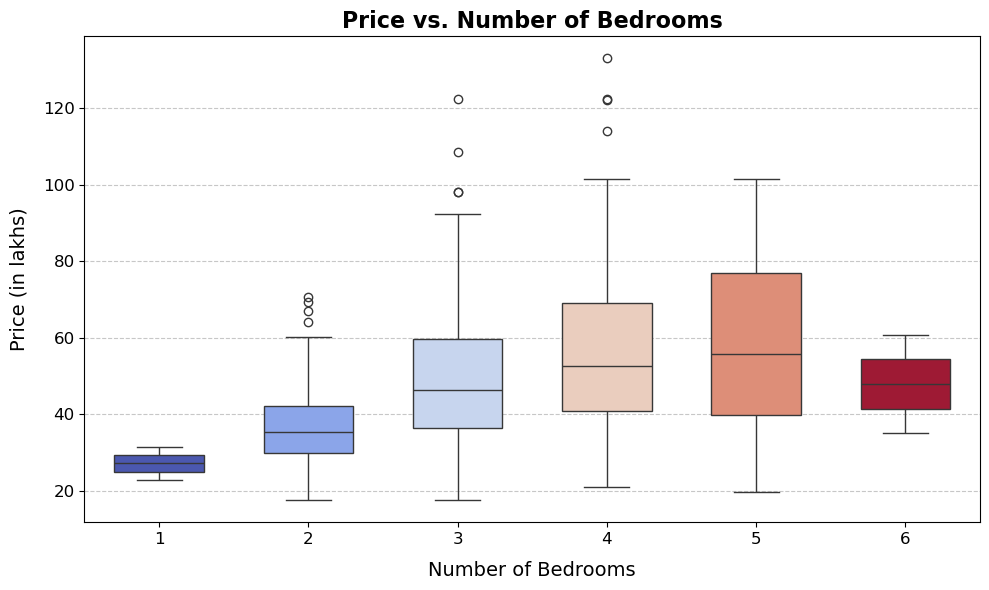

In [35]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['bedrooms'], y=df['Price_lakhs'], hue=df['bedrooms'], dodge=False, width=0.6, palette='coolwarm')

plt.title("Price vs. Number of Bedrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=14, labelpad=10)
plt.ylabel("Price (in lakhs)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend([], [], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

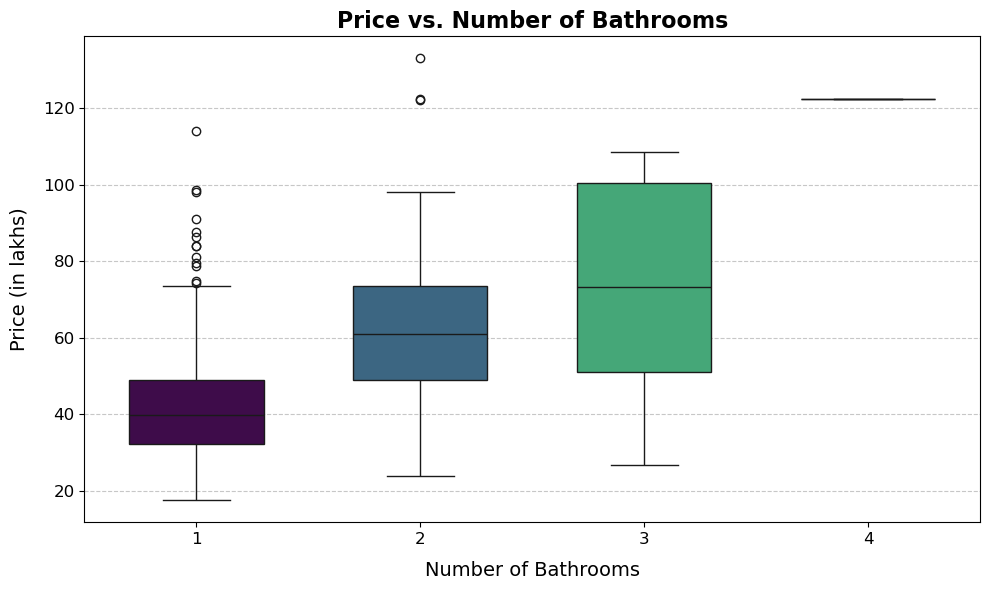

In [37]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['bathrooms'], y=df['Price_lakhs'], hue=df['bathrooms'], dodge=False, width=0.6, palette='viridis')

plt.title("Price vs. Number of Bathrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bathrooms", fontsize=14, labelpad=10)
plt.ylabel("Price (in lakhs)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend([], [], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



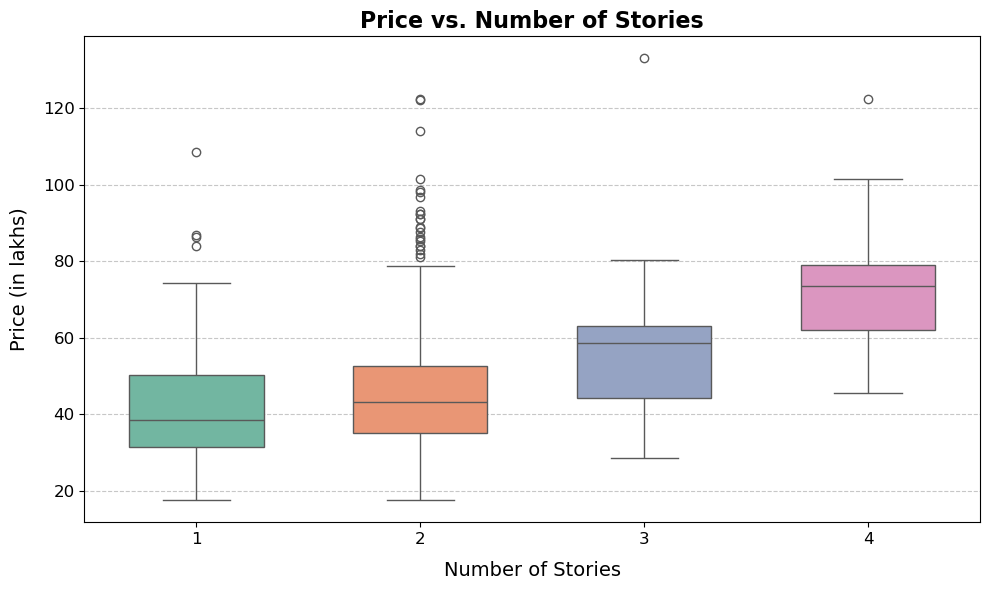

In [40]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['stories'], y=df['Price_lakhs'], hue=df['stories'], dodge=False, width=0.6, palette='Set2')

plt.title("Price vs. Number of Stories", fontsize=16, fontweight='bold')
plt.xlabel("Number of Stories", fontsize=14, labelpad=10)
plt.ylabel("Price (in lakhs)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend([], [], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


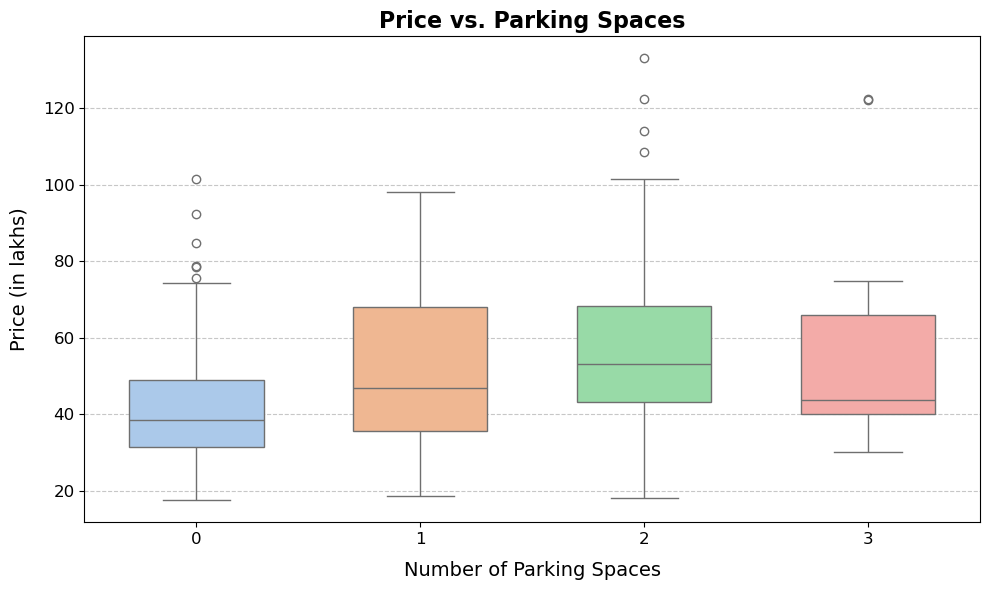

In [42]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x=df['parking'], 
    y=df['Price_lakhs'], 
    hue=df['parking'], 
    dodge=False, 
    width=0.6, 
    palette='pastel'
)

plt.title("Price vs. Parking Spaces", fontsize=16, fontweight='bold')
plt.xlabel("Number of Parking Spaces", fontsize=14, labelpad=10)
plt.ylabel("Price (in lakhs)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()



In [45]:
encoder = LabelEncoder()

encoding_col = ['furnishingstatus', 'prefarea', 'airconditioning', 
                'hotwaterheating', 'basement', 'guestroom', 'mainroad']

for col in encoding_col:
    df[col] = encoder.fit_transform(df[col])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Price_in_lakhs,Price_lakhs
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,133.00,133.00
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,122.50,122.50
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,122.50,122.50
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,122.15,122.15
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,114.10,114.10


In [49]:
X = df.drop('Price_lakhs', axis=1)
y = df['Price_lakhs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Linear Regression

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [54]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Root Mean Squared Error (RMSE): 1.1499527896252172e-14
R² Score: 1.0
